In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
#churn_data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
churn_data['describe_ex'] = churn_data['Exited'].apply(lambda x: 'ушедший клиент'if x == 1 else 'лояльный клиент') 
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,describe_ex
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,ушедший клиент
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,лояльный клиент
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,ушедший клиент
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,лояльный клиент
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,лояльный клиент


In [76]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? "круговая либо пончик" 
# Покажите это на графике и дайте комментарий по соотношению.
exited_ratio = churn_data['describe_ex'].value_counts()
#exited_ratio['describe'] = exited_ratio.index.apply(lambda x: ('лояльные'if x = 0 else 'ушедшие') )#lambda a, b: a if a > b else b
fig = px.pie(
    exited_ratio,
    values='count',
    names= exited_ratio.index,
    hole=0.8,#.apply(lambda x:{0:'лояльные', 1:'ушедшие'}),
    title='Соотношение ушедших и лояльных клиентов',
    )
fig.update_layout(
    annotations=[dict(
        text='Ушедших клиентов<br>почти<br>в 5 раз меньше<br>чем лояльных',
        x=0.5,
        y=0.5,
        font_size=20,
        showarrow=False
        )])
fig.show()

In [75]:
#exited_ratio = churn_data['Exited'].value_counts()
display(exited_ratio)

describe_ex
лояльный клиент    7963
ушедший клиент     2037
Name: count, dtype: int64

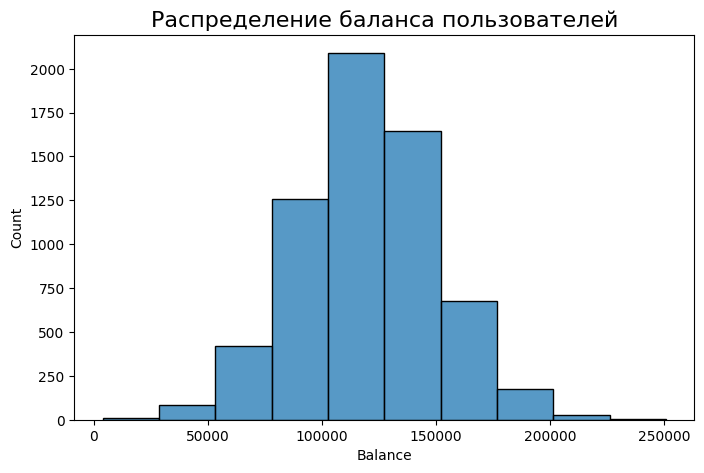

In [87]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, "гистограмма"
# у которых на счету больше 2 500 долларов. "маска"
mask = churn_data['Balance'] > 2500
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    bins=10,
    kde=False,
    
);
axes.set_title('Распределение баланса пользователей', fontsize=16);
# Опишите распределение и сделайте выводы.

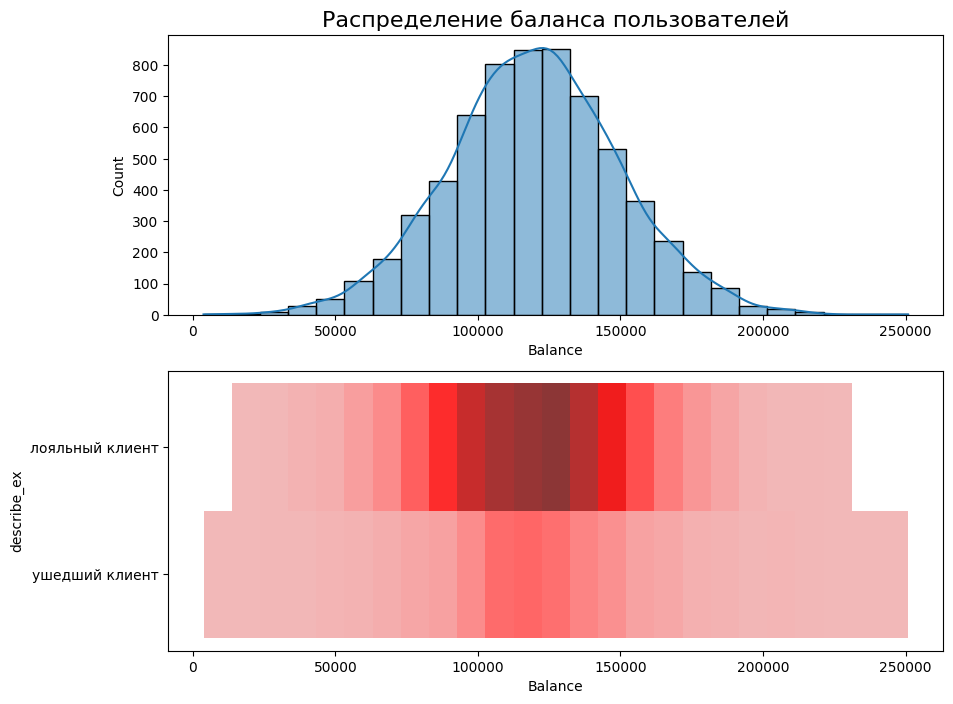

In [90]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите,
# с чем это может быть связано,
# что может не устраивать ушедших клиентов в банке.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей', fontsize=16)
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    y='describe_ex',
    bins=25,
    color='red',
    ax=axes[1]
);

In [6]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока.    "Коробчатая"
# В какой группе больше потенциальных выбросов?
# На какую возрастную категорию клиентов стоит обратить внимание банку?

In [7]:
# 9.5. Постройте график, который показывает 
# взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
# Добавьте расцветку по признаку оттока клиентов.
# Какова взаимосвязь между признаками?
# Если не видите явной взаимосвязи, укажите это.

In [8]:
# 9.6. Кто чаще уходит, мужчины или женщины?
# Постройте график, который иллюстрирует это.
# Подсказка
# Процент ушедших клиентов в каждой группе можно рассчитать
# как среднее по столбцу Exited 
# (так как 1 — это ушедшие клиенты,
# а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [9]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [10]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов?
# Постройте диаграмму, иллюстрирующую это.
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [11]:
# 9.9. В какой стране доля ушедших клиентов больше?
# Постройте тепловую картограмму,
# которая покажет это соотношение на карте мира.
# Предположите, с чем это может быть связано.

In [ ]:
# 9.10. Переведите числовой признак CreditScore в категориальный.
# Для этого воспользуйтесь функцией get_credit_score_cat(),
# которая приведена ниже.
# Примените её к столбцу CreditScore 
# и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
# Постройте сводную таблицу,
# строками которой являются категории кредитного рейтинга (CreditScoreCat),
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited)
# — доля ушедших пользователей.

# На основе полученной сводной таблицы постройте тепловую карту с аннотацией.
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.